# **K-means on images**

Use the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#Image segmentation from video using OpenCV and K-means clustering
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
original_image = cv2.imread('/content/drive/MyDrive/Machine learning/machine_learning/Sem_06/image1.jpeg')

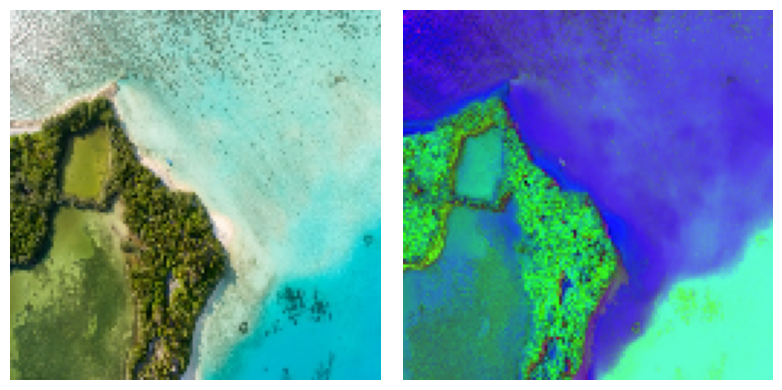

In [21]:
# Resize to a feasible size to avoid extensive computation
original_image = cv2.resize(original_image, (128,128))

# Convert from BGR Color Space to HSV
img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off() #RGB
axes[1].imshow( img_hsv ), axes[1].set_axis_off() #HSV
plt.tight_layout()
# print(original_image.shape, original_image.flatten().shape)

In [22]:
# Vectorize to compute kmeans
vectorized_rgb = img_rgb.reshape(128*128, 3)
vectorized_rgb = np.float32(vectorized_rgb)

vectorized_hsv = img_hsv[:,:,0].reshape(128*128, 1)
vectorized_hsv = np.float32(vectorized_hsv)

# # Check both vector sizes
print(vectorized_rgb.shape, vectorized_hsv.shape)
# print(vectorized_rgb.shape)
# print(vectorized_rgb)

(16384, 3) (16384, 1)


In [23]:
# Train kmeans
n = 3
kmeans = KMeans(n_clusters = n, random_state=0)
kmeans.fit( vectorized_rgb )

KMeans(n_clusters=3, random_state=0)

## **RGB image**

In [24]:
# Predict to segment regions
clustered_rgb = kmeans.predict( vectorized_rgb )
clustered_rgb = clustered_rgb.reshape( 128, 128 )

print(vectorized_rgb.shape, img_rgb.shape, clustered_rgb.shape)

(16384, 3) (128, 128, 3) (128, 128)


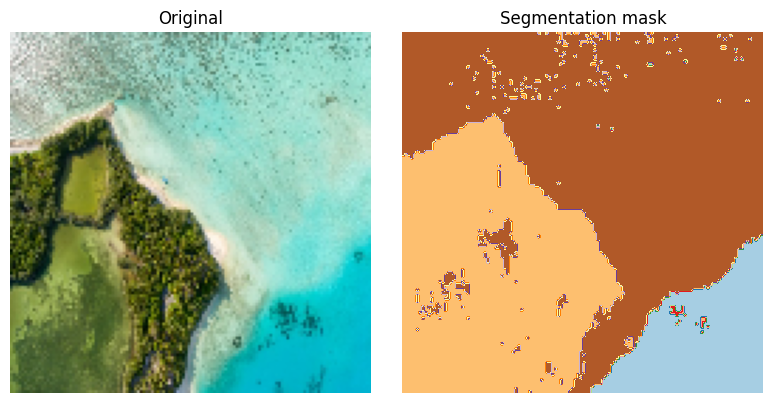

In [25]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_rgb, cmap = 'Paired' ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

In [26]:
#Funcionamiento de python
a = np.array([2,3,4,5,6,7])
b = a #Solo es un apuntador y sus cambios también afectan a 'a'
c = a.copy() #Este si es un arreglo independiente
a[3] = 50
b[1] = 60
print(a,b, c)

[ 2 60  4 50  6  7] [ 2 60  4 50  6  7] [2 3 4 5 6 7]


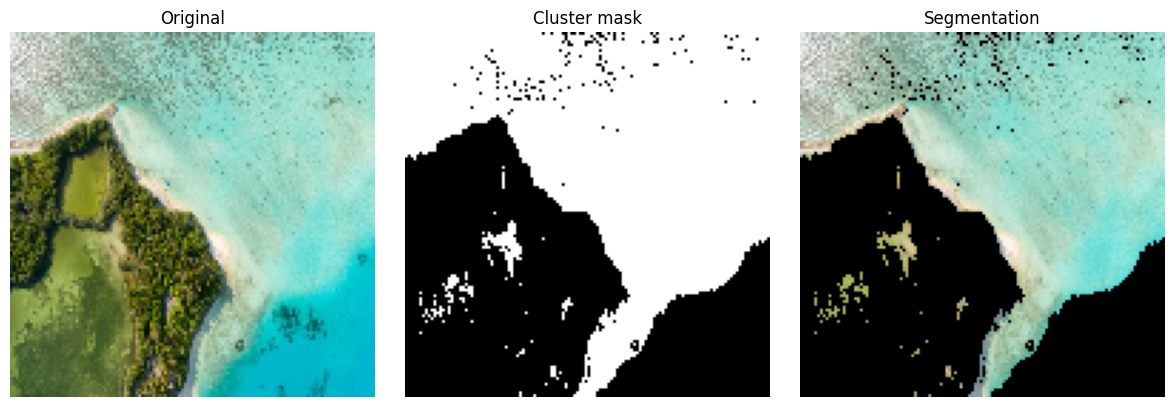

In [27]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 2

cluster_mask = np.array ( clustered_rgb == cluster , dtype = np.uint8) #la máscara debe ser un bool, por eso se debe hacer la conversión

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **HSV image**

In [28]:
# Train kmeans
n = 3
kmeans = KMeans(n_clusters = n, random_state=0).fit( vectorized_hsv )

In [29]:
# Predict to segment regions
clustered_hsv = kmeans.predict( vectorized_hsv )
clustered_hsv = clustered_hsv.reshape( 128, 128 )

print(vectorized_hsv.shape, img_rgb.shape, clustered_hsv.shape)

(16384, 1) (128, 128, 3) (128, 128)


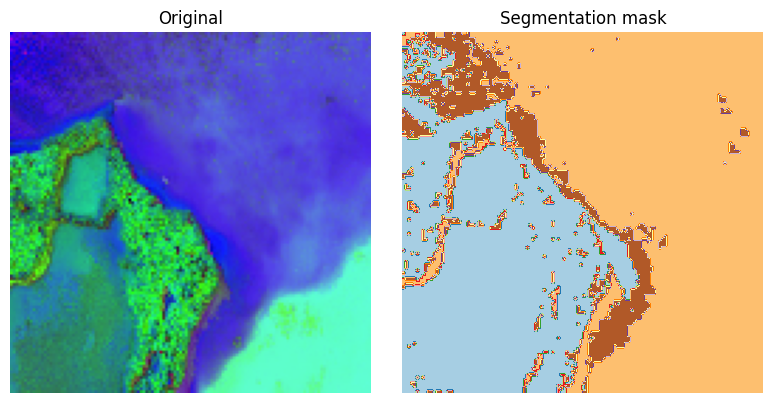

In [30]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_hsv, cmap = 'Paired' ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

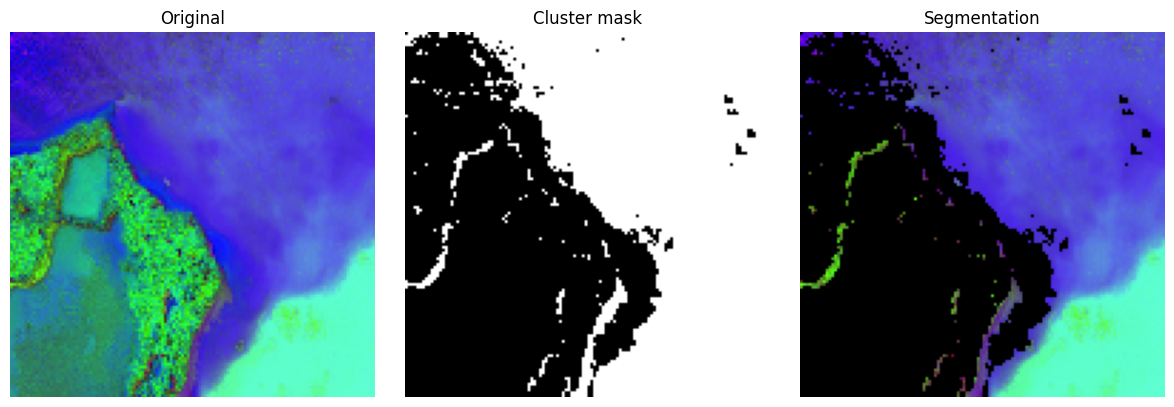

In [31]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 1

cluster_mask = np.array ( clustered_hsv == cluster , dtype = np.uint8)

masked_image = np.copy(img_hsv)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,4))
axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **Comparison**

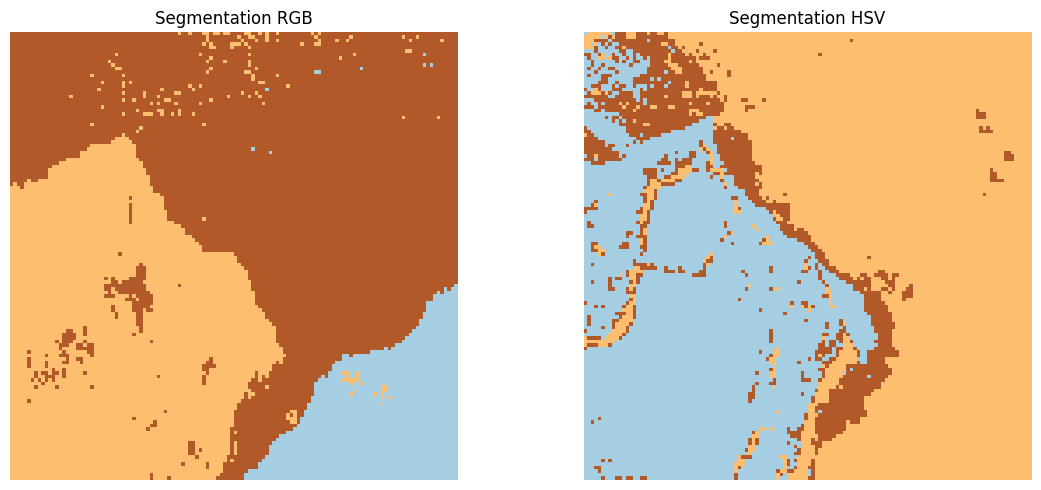

In [32]:
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow(clustered_rgb, cmap="Paired"), axes[0].set_axis_off(), axes[0].set_title("Segmentation RGB")
axes[1].imshow(clustered_hsv, cmap="Paired"), axes[1].set_axis_off(), axes[1].set_title("Segmentation HSV")
plt.tight_layout()

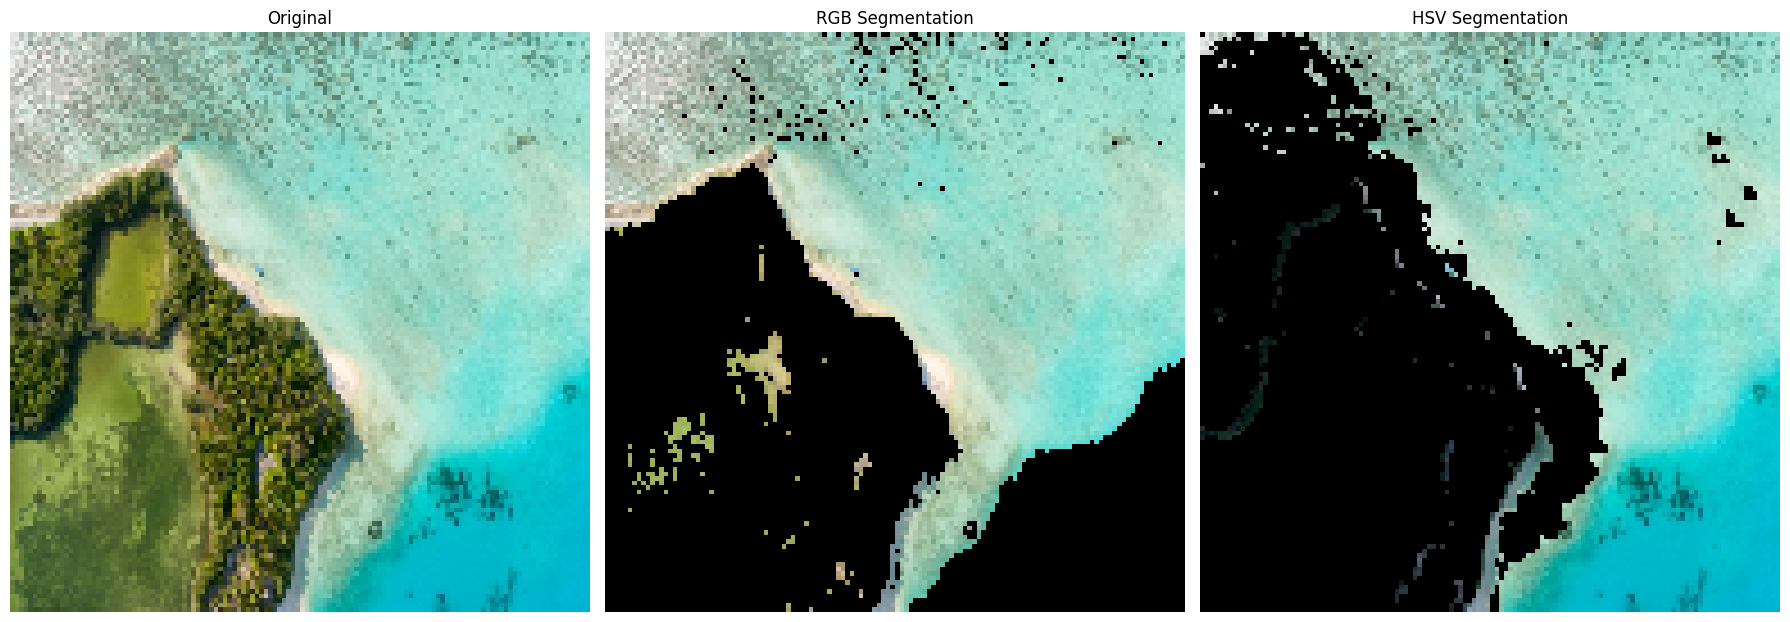

In [33]:
# Mask clusters (turn the rest of pixels into black)
cluster = 2
cluster_mask_rgb = np.array ( clustered_rgb == cluster , dtype = np.uint8)

cluster = 1
cluster_mask_hsv = np.array ( clustered_hsv == cluster , dtype = np.uint8)

masked_rgb = np.copy(img_rgb)
masked_rgb = cv2.bitwise_and(masked_rgb, masked_rgb, mask = cluster_mask_rgb )

masked_hsv = np.copy(img_rgb)
masked_hsv = cv2.bitwise_and(masked_hsv, masked_hsv, mask = cluster_mask_hsv )

_, axes = plt.subplots (1, 3, figsize = (18,8))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(masked_rgb), axes[1].set_axis_off(), axes[1].set_title("RGB Segmentation")
axes[2].imshow(masked_hsv), axes[2].set_axis_off(), axes[2].set_title("HSV Segmentation")
plt.tight_layout()

# **Elbow and Silhouette**

Perform an analysis based on elbow and silhouette to determine the best number of clusters

In [34]:
# Create a distance function
def euclidean_distance(pt1, pt2):
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

# Elbow function
def elbow_kmeans(clusters, data):
  elbow_distances = []

  for k in clusters:
      kmeans = KMeans(n_clusters=k, random_state=3)
      kmeans.fit(data)

      distances = kmeans.transform(data)  # Distance from each point to each centroid
      min_distances = np.min(distances, axis=1)  # Minimum distance to a centroid
      elbow_distances.append(np.mean(min_distances))

  return elbow_distances

In [35]:
from sklearn.metrics import silhouette_score

def silhouette_kmeans(clusters, data):
  silhouette_distances = []

  for k in clusters:
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(data)
      predictions = kmeans.predict(data)  # Fit and predict in one step

      distance = silhouette_score(data, predictions, metric="euclidean")
      silhouette_distances.append(distance)

  return silhouette_distances

In [36]:
clusters = [ 2, 3, 4, 5, 6, 7 , 8 , 9, 10 ]
elbow_distances_rgb = elbow_kmeans( clusters , vectorized_rgb )
elbow_distances_hsv = elbow_kmeans( clusters , vectorized_hsv )
silhouette_distances_rgb = silhouette_kmeans(clusters, vectorized_rgb)
silhouette_distances_hsv = silhouette_kmeans(clusters, vectorized_hsv)

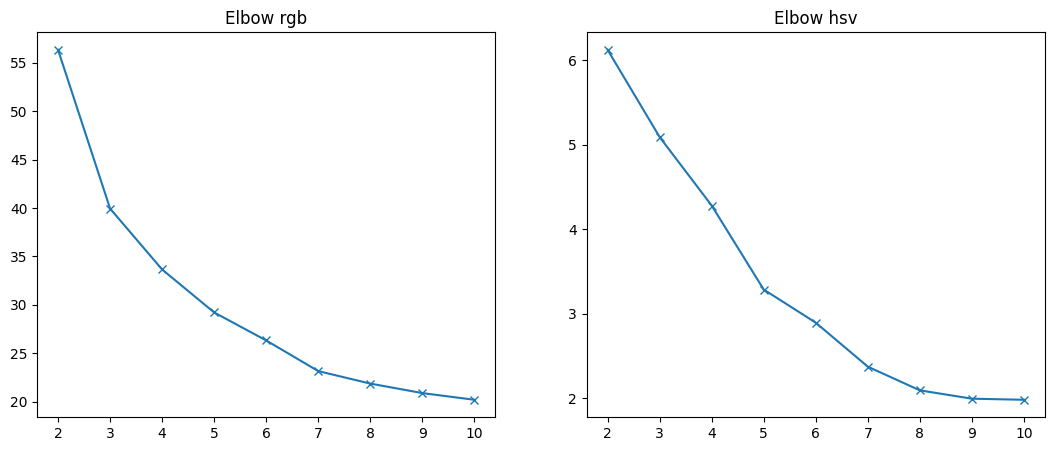

In [37]:
# Plot the elbow
_, ax = plt.subplots (1, 2, figsize = (13,5))
ax[0].plot( clusters , elbow_distances_rgb , marker="x")
ax[0].set_title("Elbow rgb")
ax[1].plot( clusters , elbow_distances_hsv , marker="x")
ax[1].set_title("Elbow hsv");

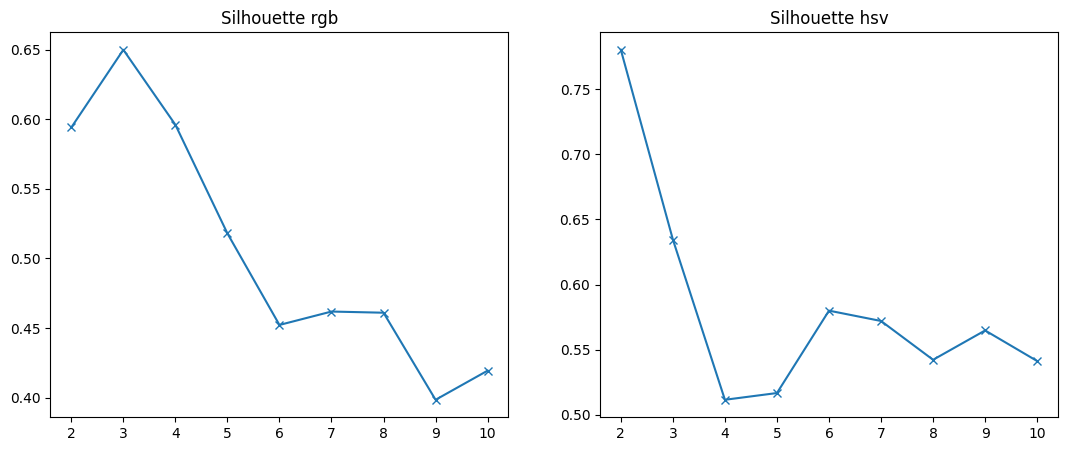

In [38]:
# Plot the silhouette
_, ax = plt.subplots (1, 2, figsize = (13,5))
ax[0].plot( clusters , silhouette_distances_rgb , marker="x")
ax[0].set_title("Silhouette rgb")
ax[1].plot( clusters , silhouette_distances_hsv , marker="x")
ax[1].set_title("Silhouette hsv");

# **In random images**


Repeat the segmentation with the following images:
 - [fr1.png](https://drive.google.com/file/d/18OR0DEx-rXeVBeqgbZqhzXXyOQhMyefb/view?usp=sharing)
 - [fr2.png](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr3.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr4.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)


Nota: solo hay una manzana (fr1), los enlaces de fr2, fr3 y fr4 llevan a descargar la imagen 1 del ejercicio de clase

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

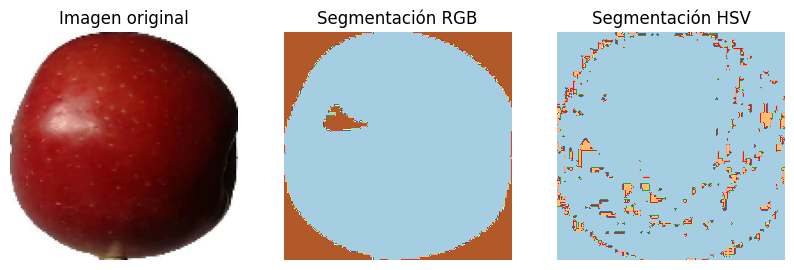

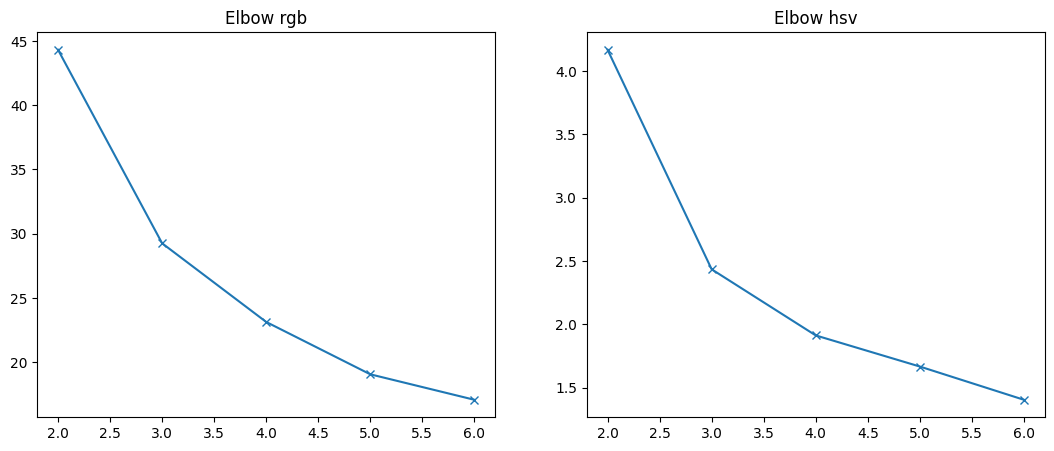

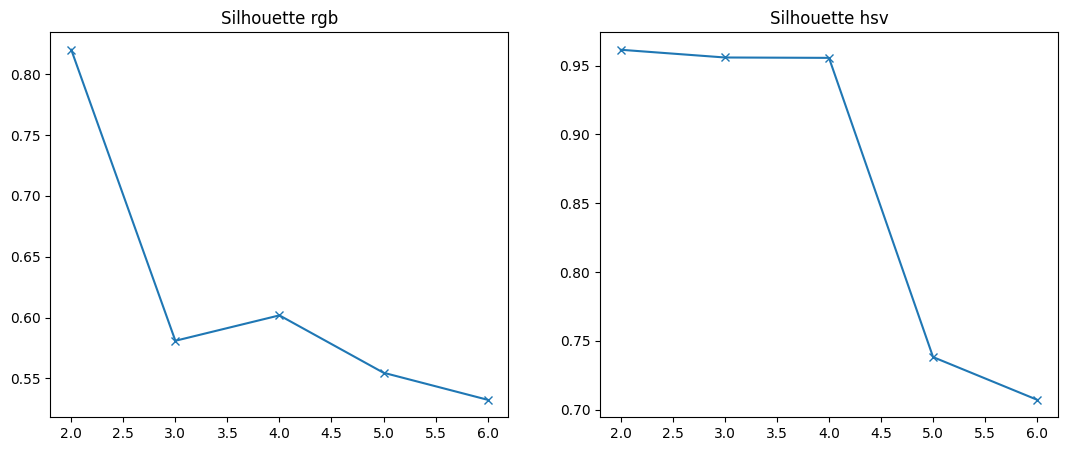

In [48]:
image_path = '/content/drive/MyDrive/Machine learning/machine_learning/Sem_06/fr1.jpg'  # Cambia la ruta si es necesario
img = cv2.imread(image_path)

size = (128, 128)
img_resized = cv2.resize(img, size)

img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)

vect_rgb = np.float32(img_rgb.reshape(size[0] * size[1], 3))
vect_hsv = np.float32(img_hsv[:,:,0].reshape(size[0] * size[1], 1))

#--------------------------------------------------
nCluster = 2

kmeans_rgb = KMeans(n_clusters=nCluster, random_state=0).fit(vect_rgb)
kmeans_hsv = KMeans(n_clusters=nCluster, random_state=0).fit(vect_hsv)

clustered_rgb = kmeans_rgb.predict(vect_rgb).reshape(size)
clustered_hsv = kmeans_hsv.predict(vect_hsv).reshape(size)

#--------------------------------------------------

cluster_mask = np.array ( clustered_rgb == nCluster , dtype = np.uint8)
masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

clustered_hsv = kmeans.predict( vect_hsv )
clustered_hsv = clustered_hsv.reshape( size)

#--------------------------------------------------

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(rgb_img)
ax[0].set_title("Imagen original")
ax[0].set_axis_off()

ax[1].imshow(clustered_rgb, cmap="Paired")
ax[1].set_title("Segmentación RGB")
ax[1].set_axis_off()

ax[2].imshow(clustered_hsv, cmap="Paired")
ax[2].set_title("Segmentación HSV")
ax[2].set_axis_off();

clusters = [ 2, 3, 4, 5, 6]
elbow_distances_rgb = elbow_kmeans( clusters , vect_rgb )
elbow_distances_hsv = elbow_kmeans( clusters , vect_hsv )
silhouette_distances_rgb = silhouette_kmeans(clusters, vect_rgb)
silhouette_distances_hsv = silhouette_kmeans(clusters, vect_hsv)

#--------------------------------------------------

# Plot the elbow
_, ax = plt.subplots (1, 2, figsize = (13,5))
ax[0].plot( clusters , elbow_distances_rgb , marker="x")
ax[0].set_title("Elbow rgb")
ax[1].plot( clusters , elbow_distances_hsv , marker="x")
ax[1].set_title("Elbow hsv");

# Plot the silhouette
_, ax = plt.subplots (1, 2, figsize = (13,5))
ax[0].plot( clusters , silhouette_distances_rgb , marker="x")
ax[0].set_title("Silhouette rgb")
ax[1].plot( clusters , silhouette_distances_hsv , marker="x")
ax[1].set_title("Silhouette hsv");